

NAMA: MUHAMMAD ZAKIYUDDIN




NIM : 24.21.1581



**Soal Nomor 1 A**

Bidang yang dipilih adalah tentang tingkat depresi individu berdasarkan berbagai faktor.

Alasan memilih bidang ini adalah karena perkembangan dunia sekarang yang mengarah kepada kesehatan mental, membuat seseorang menjadi depresi jika tidak bisa mengendalikan diri nya. Tentunya tingkat depresi juga dapat disebabkan berbagai faktor, maka dengan analisis di bisang ini nantinya saya berharap bisa mengetahui secara mendalam faktor-faktor apa yang membuat tingkat depresi menjadi tinggi dll.


**Soal Nomor 1 B**

Proses mendapatkan informasi ini melalui website Kaggle, ada beberapa dataset yang menjadi perbandingan, namun saya memilih dataset ini. Proses mencari dataset beberapa hari mulai tanggal 15 Januari, dan fix memilih dataset tersebut ditanggal 20 januari 2025.

Informasi tentang Data:

Deskripsi Kolom:



1.   **Name**: Nama lengkap individu.
2.   **Age**: Usia individu dalam tahun.  
3. **Marital Status**: Status perkawinan individu. Nilai yang memungkinkan termasuk Lajang, Menikah, Cerai, dan Duda/Janda.
4. **Education Level**: Tingkat pendidikan tertinggi yang dicapai oleh individu. Nilai yang memungkinkan termasuk SMA, Gelar Sarjana Muda, Gelar Sarjana, Gelar Magister, dan PhD.  
5. **Number of Children**: Jumlah anak yang dimiliki individu.  
6. **Smoking Status**: Menunjukkan apakah individu seorang perokok atau tidak. Nilai yang memungkinkan termasuk Perokok, Mantan Perokok, dan Tidak Merokok.  
7. **Physical Activity Level**: Tingkat aktivitas fisik yang dilakukan oleh individu. Nilai yang memungkinkan termasuk Sedentari (tidak aktif), Moderat, dan Aktif.  
8. **Employment Status**: Status pekerjaan individu. Nilai yang memungkinkan termasuk Bekerja dan Tidak Bekerja.  
9. **Income**: Pendapatan tahunan individu dalam USD.  
10. **Alcohol Consumption**: Tingkat konsumsi alkohol. Nilai yang memungkinkan termasuk Rendah, Sedang, dan Tinggi.  
11. **Dietary Habits**: Kebiasaan makan individu. Nilai yang memungkinkan termasuk Sehat, Sedang, dan Tidak Sehat.  
12. **Sleep Patterns**: Kualitas tidur. Nilai yang memungkinkan termasuk Baik, Cukup, dan Buruk.  
13. **History of Mental Illness**: Apakah individu memiliki riwayat penyakit mental. Nilai yang memungkinkan adalah Ya dan Tidak.  
14. **History of Substance Abuse**: Apakah individu memiliki riwayat penyalahgunaan zat. Nilai yang memungkinkan adalah Ya dan Tidak.  
15. **Family History of Depression**: Menunjukkan apakah ada riwayat keluarga yang mengalami depresi. Nilai yang memungkinkan adalah Ya dan Tidak.  
16. **Chronic Medical Conditions**: Apakah individu memiliki kondisi medis kronis. Nilai yang memungkinkan adalah Ya dan Tidak.

In [ ]:
!pip install pyspark

**Soal Nomor 1 C**

Pre Processing Data:
Memeriksa tipe data, mengganti nama kolom, memeriksa nilai null, mengubah tipe data (agar bisa di proses), menampilkan summary, dan menampilkan matriks korelasinya

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.appName('Deppression Analytic').getOrCreate()

path = 'depression_data.csv'
df = spark.read.csv(path, header = True, inferSchema = True)
print("Tipe Data")
df.printSchema()

Tipe Data
root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Marital Status: string (nullable = true)
 |-- Education Level: string (nullable = true)
 |-- Number of Children: integer (nullable = true)
 |-- Smoking Status: string (nullable = true)
 |-- Physical Activity Level: string (nullable = true)
 |-- Employment Status: string (nullable = true)
 |-- Income: double (nullable = true)
 |-- Alcohol Consumption: string (nullable = true)
 |-- Dietary Habits: string (nullable = true)
 |-- Sleep Patterns: string (nullable = true)
 |-- History of Mental Illness: string (nullable = true)
 |-- History of Substance Abuse: string (nullable = true)
 |-- Family History of Depression: string (nullable = true)
 |-- Chronic Medical Conditions: string (nullable = true)



In [ ]:
df = df.withColumnRenamed('Name', 'Nama') \
       .withColumnRenamed('Age', 'Usia') \
       .withColumnRenamed('Marital Status', 'Status Perkawinan') \
       .withColumnRenamed('Education Level', 'Tingkat Pendidikan') \
       .withColumnRenamed('Number of Children', 'Jumlah Anak') \
       .withColumnRenamed('Smoking Status', 'Status Merokok') \
       .withColumnRenamed('Physical Activity Level', 'Tingkat Aktivitas Fisik') \
       .withColumnRenamed('Employment Status', 'Status Pekerjaan') \
       .withColumnRenamed('Income', 'Pendapatan') \
       .withColumnRenamed('Alcohol Consumption', 'Konsumsi Alkohol') \
       .withColumnRenamed('Dietary Habits', 'Kebiasaan Diet') \
       .withColumnRenamed('Sleep Patterns', 'Pola Tidur') \
       .withColumnRenamed('History of Mental Illness', 'Riwayat Penyakit Mental') \
       .withColumnRenamed('History of Substance Abuse', 'Riwayat Penyalahgunaan Zat') \
       .withColumnRenamed('Family History of Depression', 'Riwayat Keluarga Depresi') \
       .withColumnRenamed('Chronic Medical Conditions', 'Kondisi Medis Kronis')

df.printSchema()

root
 |-- Nama: string (nullable = true)
 |-- Usia: integer (nullable = true)
 |-- Status Perkawinan: string (nullable = true)
 |-- Tingkat Pendidikan: string (nullable = true)
 |-- Jumlah Anak: integer (nullable = true)
 |-- Status Merokok: string (nullable = true)
 |-- Tingkat Aktivitas Fisik: string (nullable = true)
 |-- Status Pekerjaan: string (nullable = true)
 |-- Pendapatan: double (nullable = true)
 |-- Konsumsi Alkohol: string (nullable = true)
 |-- Kebiasaan Diet: string (nullable = true)
 |-- Pola Tidur: string (nullable = true)
 |-- Riwayat Penyakit Mental: string (nullable = true)
 |-- Riwayat Penyalahgunaan Zat: string (nullable = true)
 |-- Riwayat Keluarga Depresi: string (nullable = true)
 |-- Kondisi Medis Kronis: string (nullable = true)



In [ ]:
import pandas as pd
data = df.toPandas()

print("\nJumlah Nilai Null:")
print(data.isnull().sum())
df.show()


Jumlah Nilai Null:
Nama                          0
Usia                          0
Status Perkawinan             0
Tingkat Pendidikan            0
Jumlah Anak                   0
Status Merokok                0
Tingkat Aktivitas Fisik       0
Status Pekerjaan              0
Pendapatan                    0
Konsumsi Alkohol              0
Kebiasaan Diet                0
Pola Tidur                    0
Riwayat Penyakit Mental       0
Riwayat Penyalahgunaan Zat    0
Riwayat Keluarga Depresi      0
Kondisi Medis Kronis          0
dtype: int64
+-------------------+----+-----------------+------------------+-----------+--------------+-----------------------+----------------+----------+----------------+--------------+----------+-----------------------+--------------------------+------------------------+--------------------+
|               Nama|Usia|Status Perkawinan|Tingkat Pendidikan|Jumlah Anak|Status Merokok|Tingkat Aktivitas Fisik|Status Pekerjaan|Pendapatan|Konsumsi Alkohol|Kebiasaan Die

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("\nSummery Data:")
print(data.describe(include='all'))


Summery Data:
                 Nama           Usia Status Perkawinan Tingkat Pendidikan  \
count          413768  413768.000000            413768             413768   
unique         196851            NaN                 4                  5   
top     Michael Smith            NaN           Married  Bachelor's Degree   
freq              198            NaN            240444             124329   
mean              NaN      49.000713               NaN                NaN   
std               NaN      18.158759               NaN                NaN   
min               NaN      18.000000               NaN                NaN   
25%               NaN      33.000000               NaN                NaN   
50%               NaN      49.000000               NaN                NaN   
75%               NaN      65.000000               NaN                NaN   
max               NaN      80.000000               NaN                NaN   

          Jumlah Anak Status Merokok Tingkat Aktivitas Fisik

Gunakan exploratory data analysis (EDA) untuk melihat sudut pandang yang ada mengenai data (minimal 4) dua diantaranya bar dan pie chart, 2 diantaranya bebas. Berikan penjelasan.

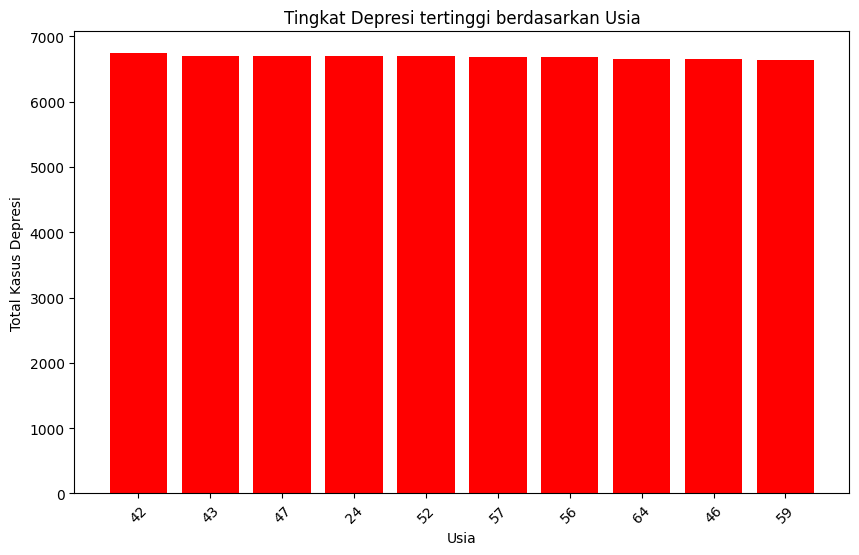

In [ ]:
from pyspark.sql.functions import col, count
import matplotlib.pyplot as plt

depression_by_age = (df.groupBy("Usia")
                       .agg(count("*").alias("Total Depresi"))
                       .orderBy(col("Total Depresi").desc())
                       .limit(10))

depression_by_age_pd = depression_by_age.toPandas()
depression_by_age_pd["Usia"] = depression_by_age_pd["Usia"].astype(str)

plt.figure(figsize=(10, 6))
plt.bar(depression_by_age_pd["Usia"], depression_by_age_pd["Total Depresi"], color="red")
plt.title("Tingkat Depresi tertinggi berdasarkan Usia")
plt.xlabel("Usia")
plt.ylabel("Total Kasus Depresi")
plt.xticks(rotation=45)
plt.show()

**1. Bar Chart**

Chart batang diatas menunjukkan 10 usia dengan tingkat depresi tertinggi.
Sumbu X menunjukkan 10 Usia tertinggi
Sumbu Y menunjukkan jumlah total kasus depresi

Dengan berdasar chart diatas menunjukkan bahwa jumlah kasus depresi sesuai usia tersebut sangat tinggi, lebih dari 1500 orang

Jadi kesimpulannya di usia-usia tersebut perlu perhatian khusus masalah kasus depresi.

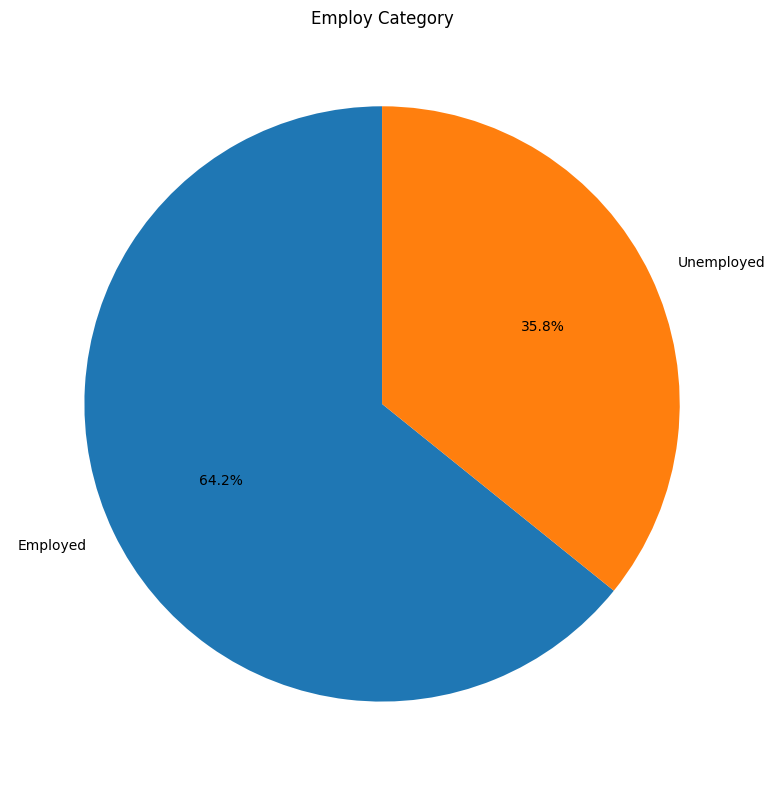

In [ ]:
employment_status_pd = df.select("Status Pekerjaan").toPandas()
employment_status_counts = employment_status_pd["Status Pekerjaan"].value_counts()
employment_status_counts.plot(kind="pie", autopct="%1.1f%%", figsize=(8,8), startangle=90)

plt.title("Employ Category")
plt.ylabel("")
plt.tight_layout()
plt.show()

#employment_status_pd.show()

**2. Pie Chart**

Pie chart menunjukkan tentang kategori karyawan dan bukan karyawan yang mendapati masalah depresi. Dari gambar atau grafik pie diatas menunjukkan bahwa orang yang sedang bekerja atau karyawan mempunyai tingkat depresi yang lebih tinggi.

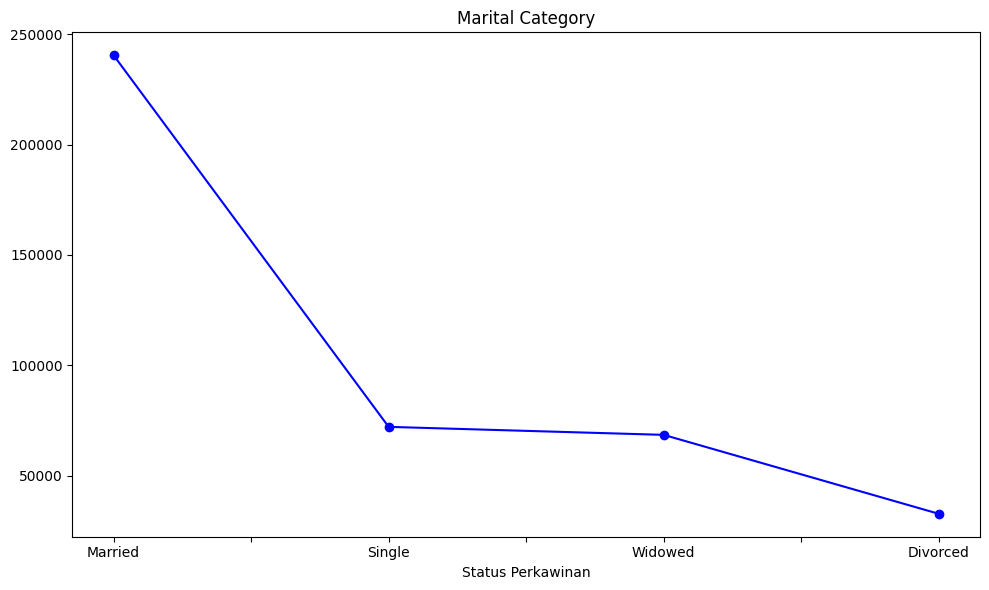

In [ ]:
employment_status_pd = df.select("Status Perkawinan").toPandas()
employment_status_counts = employment_status_pd["Status Perkawinan"].value_counts()
employment_status_counts.plot(
    kind="line", marker="o", color="blue", figsize=(10,6)
    )

plt.title("Marital Category")
plt.ylabel("")
plt.tight_layout()
plt.show()

**3. Line Chart**

Line chart diatas menunjukkan banyaknya tingkat depresi yang menimpa orang-orang berdasarkan kategori pernikahan.

Berdasar grafik diatas tingkat depresi tertinggi menimpa orang yang telah menikah, kemudian kedua menimpa single, yang ketiga menimpa janda, dan yang terakhir menimpa orang yang sudah bercerai.

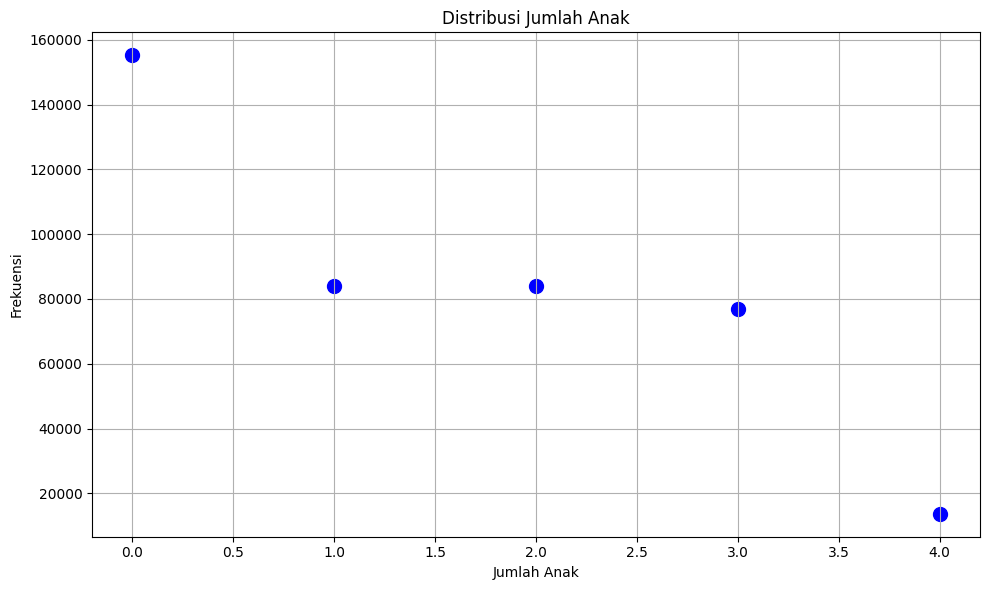

In [ ]:
jumlah_anak_pd = df.select("Jumlah Anak").toPandas()

jumlah_anak_counts = jumlah_anak_pd["Jumlah Anak"].value_counts().reset_index()
jumlah_anak_counts.columns = ["Jumlah Anak", "Frekuensi"]

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(
    jumlah_anak_counts["Jumlah Anak"],
    jumlah_anak_counts["Frekuensi"],
    color="blue",
    s=100
)

plt.title("Distribusi Jumlah Anak")
plt.xlabel("Jumlah Anak")
plt.ylabel("Frekuensi")

plt.grid(True)
plt.tight_layout()
plt.show()


**4. Scatter Plot**

Scatter Plot diatas menunjukkan banyaknya tingkat depresi yang menimpa orang-orang berdasarkan jumlah anak.

Berdasar plot atau titik-titik diatas tingkat depresi tertinggi menimpa orang yang tidak mempunyai anak, kemudian kedua menimpa keluarga yang mempunyai 2 anak, selanjutnya ketiga menimpa keluarga yang mempunyai 1 anak, kemudian 3 anak dan terakhir terendah terhadap keluarga yang mempunyai 4 anak.

**Soal Nomor 2**

In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import (
    RandomForestClassifier,
    GBTClassifier,
    LogisticRegression,
    DecisionTreeClassifier
)
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator


In [ ]:
path = 'depression_data.csv'
df2 = spark.read.csv(path, header = True, inferSchema = True)

df2 = df2.withColumnRenamed('Name', 'Nama') \
       .withColumnRenamed('Age', 'Usia') \
       .withColumnRenamed('Marital Status', 'Status Perkawinan') \
       .withColumnRenamed('Education Level', 'Tingkat Pendidikan') \
       .withColumnRenamed('Number of Children', 'Jumlah Anak') \
       .withColumnRenamed('Smoking Status', 'Status Merokok') \
       .withColumnRenamed('Physical Activity Level', 'Tingkat Aktivitas Fisik') \
       .withColumnRenamed('Employment Status', 'Status Pekerjaan') \
       .withColumnRenamed('Income', 'Pendapatan') \
       .withColumnRenamed('Alcohol Consumption', 'Konsumsi Alkohol') \
       .withColumnRenamed('Dietary Habits', 'Kebiasaan Diet') \
       .withColumnRenamed('Sleep Patterns', 'Pola Tidur') \
       .withColumnRenamed('History of Mental Illness', 'Riwayat Penyakit Mental') \
       .withColumnRenamed('History of Substance Abuse', 'Riwayat Penyalahgunaan Zat') \
       .withColumnRenamed('Family History of Depression', 'Riwayat Keluarga Depresi') \
       .withColumnRenamed('Chronic Medical Conditions', 'Kondisi Medis Kronis')

indexer = StringIndexer(inputCol="Usia", outputCol="label")
df2 = indexer.fit(df2).transform(df2)

feature_columns = ['Usia', 'Jumlah Anak', 'Pendapatan']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df2 = assembler.transform(df2).select("features", "label")

train_data, test_data = df2.randomSplit([0.8, 0.2], seed=42)

# Random Forest Classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=100)
rf_model = rf.fit(train_data)

predictions_rf = rf_model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
accuracy_rf = evaluator.evaluate(predictions_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

f1_rf = MulticlassClassificationEvaluator(labelCol="label", metricName="f1").evaluate(predictions_rf)
print(f"F1 Score: {f1_rf}")


Random Forest Accuracy: 0.49906582611106426
F1 Score: 0.4390454939638887


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import when

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("MentalHealthPrediction").getOrCreate()

path = 'depression_data.csv'
df2 = spark.read.csv(path, header=True, inferSchema=True)

df2 = df2.withColumnRenamed('Name', 'Nama') \
       .withColumnRenamed('Age', 'Usia') \
       .withColumnRenamed('Marital Status', 'Status Perkawinan') \
       .withColumnRenamed('Education Level', 'Tingkat Pendidikan') \
       .withColumnRenamed('Number of Children', 'Jumlah Anak') \
       .withColumnRenamed('Smoking Status', 'Status Merokok') \
       .withColumnRenamed('Physical Activity Level', 'Tingkat Aktivitas Fisik') \
       .withColumnRenamed('Employment Status', 'Status Pekerjaan') \
       .withColumnRenamed('Income', 'Pendapatan') \
       .withColumnRenamed('Alcohol Consumption', 'Konsumsi Alkohol') \
       .withColumnRenamed('Dietary Habits', 'Kebiasaan Diet') \
       .withColumnRenamed('Sleep Patterns', 'Pola Tidur') \
       .withColumnRenamed('History of Mental Illness', 'Riwayat Penyakit Mental') \
       .withColumnRenamed('History of Substance Abuse', 'Riwayat Penyalahgunaan Zat') \
       .withColumnRenamed('Family History of Depression', 'Riwayat Keluarga Depresi') \
       .withColumnRenamed('Chronic Medical Conditions', 'Kondisi Medis Kronis')

# Pastikan label adalah biner dengan StringIndexer pada kolom yang sesuai
indexer = StringIndexer(inputCol="Riwayat Penyakit Mental", outputCol="label")
df2 = indexer.fit(df2).transform(df2)

# Konversi nilai label ke biner (0 atau 1)
df2 = df2.withColumn("label", when(df2["label"] > 0, 1).otherwise(0))

# Periksa nilai unik dalam label untuk memastikan sudah biner
df2.select("label").distinct().show()

# Gabungkan fitur
feature_columns = ['Usia', 'Jumlah Anak', 'Pendapatan']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df2 = assembler.transform(df2).select("features", "label")

# Split data menjadi train dan test
train_data, test_data = df2.randomSplit([0.8, 0.2], seed=42)

# Gradient Boosted Tree Classifier
gbt = GBTClassifier(labelCol="label", featuresCol="features", maxIter=100)
gbt_model = gbt.fit(train_data)

predictions_gbt = gbt_model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
accuracy_gbt = evaluator.evaluate(predictions_gbt)
print(f"Gradient Boosted Tree Accuracy: {accuracy_gbt}")

f1_gbt = MulticlassClassificationEvaluator(labelCol="label", metricName="f1").evaluate(predictions_gbt)
print(f"F1 Score: {f1_gbt}")


+-----+
|label|
+-----+
|    1|
|    0|
+-----+

Gradient Boosted Tree Accuracy: 0.6933981027229662
F1 Score: 0.5678533926389623


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import when

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("MentalHealthPrediction").getOrCreate()

path = 'depression_data.csv'
df2 = spark.read.csv(path, header=True, inferSchema=True)

df2 = df2.withColumnRenamed('Name', 'Nama') \
       .withColumnRenamed('Age', 'Usia') \
       .withColumnRenamed('Marital Status', 'Status Perkawinan') \
       .withColumnRenamed('Education Level', 'Tingkat Pendidikan') \
       .withColumnRenamed('Number of Children', 'Jumlah Anak') \
       .withColumnRenamed('Smoking Status', 'Status Merokok') \
       .withColumnRenamed('Physical Activity Level', 'Tingkat Aktivitas Fisik') \
       .withColumnRenamed('Employment Status', 'Status Pekerjaan') \
       .withColumnRenamed('Income', 'Pendapatan') \
       .withColumnRenamed('Alcohol Consumption', 'Konsumsi Alkohol') \
       .withColumnRenamed('Dietary Habits', 'Kebiasaan Diet') \
       .withColumnRenamed('Sleep Patterns', 'Pola Tidur') \
       .withColumnRenamed('History of Mental Illness', 'Riwayat Penyakit Mental') \
       .withColumnRenamed('History of Substance Abuse', 'Riwayat Penyalahgunaan Zat') \
       .withColumnRenamed('Family History of Depression', 'Riwayat Keluarga Depresi') \
       .withColumnRenamed('Chronic Medical Conditions', 'Kondisi Medis Kronis')

# Pastikan label adalah biner dengan StringIndexer pada kolom yang sesuai
indexer = StringIndexer(inputCol="Riwayat Penyakit Mental", outputCol="label")
df2 = indexer.fit(df2).transform(df2)

# Konversi nilai label ke biner (0 atau 1)
df2 = df2.withColumn("label", when(df2["label"] > 0, 1).otherwise(0))

# Periksa nilai unik dalam label untuk memastikan sudah biner
df2.select("label").distinct().show()

# Gabungkan fitur
feature_columns = ['Usia', 'Jumlah Anak', 'Pendapatan']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df2 = assembler.transform(df2).select("features", "label")

# Split data menjadi train dan test
train_data, test_data = df2.randomSplit([0.8, 0.2], seed=42)

# Logistic Regression Classifier
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=100)
lr_model = lr.fit(train_data)

predictions_lr = lr_model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
accuracy_lr = evaluator.evaluate(predictions_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

f1_lr = MulticlassClassificationEvaluator(labelCol="label", metricName="f1").evaluate(predictions_lr)
print(f"F1 Score: {f1_lr}")


+-----+
|label|
+-----+
|    1|
|    0|
+-----+

Logistic Regression Accuracy: 0.6933981027229662
F1 Score: 0.5678533926389623


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import when

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("MentalHealthPrediction").getOrCreate()

path = 'depression_data.csv'
df2 = spark.read.csv(path, header=True, inferSchema=True)

df2 = df2.withColumnRenamed('Name', 'Nama') \
       .withColumnRenamed('Age', 'Usia') \
       .withColumnRenamed('Marital Status', 'Status Perkawinan') \
       .withColumnRenamed('Education Level', 'Tingkat Pendidikan') \
       .withColumnRenamed('Number of Children', 'Jumlah Anak') \
       .withColumnRenamed('Smoking Status', 'Status Merokok') \
       .withColumnRenamed('Physical Activity Level', 'Tingkat Aktivitas Fisik') \
       .withColumnRenamed('Employment Status', 'Status Pekerjaan') \
       .withColumnRenamed('Income', 'Pendapatan') \
       .withColumnRenamed('Alcohol Consumption', 'Konsumsi Alkohol') \
       .withColumnRenamed('Dietary Habits', 'Kebiasaan Diet') \
       .withColumnRenamed('Sleep Patterns', 'Pola Tidur') \
       .withColumnRenamed('History of Mental Illness', 'Riwayat Penyakit Mental') \
       .withColumnRenamed('History of Substance Abuse', 'Riwayat Penyalahgunaan Zat') \
       .withColumnRenamed('Family History of Depression', 'Riwayat Keluarga Depresi') \
       .withColumnRenamed('Chronic Medical Conditions', 'Kondisi Medis Kronis')

# Pastikan label adalah biner dengan StringIndexer pada kolom yang sesuai
indexer = StringIndexer(inputCol="Riwayat Penyakit Mental", outputCol="label")
df2 = indexer.fit(df2).transform(df2)

# Konversi nilai label ke biner (0 atau 1)
df2 = df2.withColumn("label", when(df2["label"] > 0, 1).otherwise(0))

# Periksa nilai unik dalam label untuk memastikan sudah biner
df2.select("label").distinct().show()

# Gabungkan fitur
feature_columns = ['Usia', 'Jumlah Anak', 'Pendapatan']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df2 = assembler.transform(df2).select("features", "label")

# Split data menjadi train dan test
train_data, test_data = df2.randomSplit([0.8, 0.2], seed=42)

# Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
dt_model = dt.fit(train_data)

predictions_dt = dt_model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
accuracy_dt = evaluator.evaluate(predictions_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

f1_dt = MulticlassClassificationEvaluator(labelCol="label", metricName="f1").evaluate(predictions_dt)
print(f"F1 Score: {f1_dt}")


+-----+
|label|
+-----+
|    1|
|    0|
+-----+

Decision Tree Accuracy: 0.6933981027229662
F1 Score: 0.5678533926389623


Nomor 2

In [7]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import GBTClassifier, DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql.functions import when

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("MentalHealthPrediction").getOrCreate()

# Membaca dataset
path = 'depression_data.csv'
df2 = spark.read.csv(path, header=True, inferSchema=True)

# Mengganti nama kolom agar lebih mudah digunakan
df2 = df2.withColumnRenamed('Name', 'Nama') \
         .withColumnRenamed('Age', 'Usia') \
         .withColumnRenamed('Marital Status', 'Status Perkawinan') \
         .withColumnRenamed('Education Level', 'Tingkat Pendidikan') \
         .withColumnRenamed('Number of Children', 'Jumlah Anak') \
         .withColumnRenamed('Smoking Status', 'Status Merokok') \
         .withColumnRenamed('Physical Activity Level', 'Tingkat Aktivitas Fisik') \
         .withColumnRenamed('Employment Status', 'Status Pekerjaan') \
         .withColumnRenamed('Income', 'Pendapatan') \
         .withColumnRenamed('Alcohol Consumption', 'Konsumsi Alkohol') \
         .withColumnRenamed('Dietary Habits', 'Kebiasaan Diet') \
         .withColumnRenamed('Sleep Patterns', 'Pola Tidur') \
         .withColumnRenamed('History of Mental Illness', 'Riwayat Penyakit Mental') \
         .withColumnRenamed('History of Substance Abuse', 'Riwayat Penyalahgunaan Zat') \
         .withColumnRenamed('Family History of Depression', 'Riwayat Keluarga Depresi') \
         .withColumnRenamed('Chronic Medical Conditions', 'Kondisi Medis Kronis')

# Mengonversi nilai label menjadi biner
indexer = StringIndexer(inputCol="Riwayat Penyakit Mental", outputCol="label", handleInvalid="keep")
df2 = indexer.fit(df2).transform(df2)

# Pastikan label hanya 0 dan 1
df2 = df2.withColumn("label", when(df2["label"] > 0, 1).otherwise(0))
df2.select("label").distinct().show()

# Menggabungkan fitur numerik yang relevan
feature_columns = ['Usia', 'Jumlah Anak', 'Pendapatan']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df2 = assembler.transform(df2).select("features", "label")

# Split data menjadi training dan testing set
train_data, test_data = df2.randomSplit([0.8, 0.2], seed=42)

# Gradient Boosted Tree Classifier dengan hyperparameter tuning
gbt = GBTClassifier(labelCol="label", featuresCol="features", seed=42)

gbt_param_grid = ParamGridBuilder() \
    .addGrid(gbt.maxDepth, [5, 10]) \
    .addGrid(gbt.maxIter, [50, 100]) \
    .addGrid(gbt.stepSize, [0.05, 0.1]) \
    .build()

evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")

gbt_cv = CrossValidator(estimator=gbt,
                        estimatorParamMaps=gbt_param_grid,
                        evaluator=evaluator,
                        numFolds=5)

print("Training Gradient Boosted Tree...")
gbt_model = gbt_cv.fit(train_data)
predictions_gbt = gbt_model.transform(test_data)

# Evaluasi performa Gradient Boosted Tree
accuracy_gbt = evaluator.evaluate(predictions_gbt)
print(f"Gradient Boosted Tree AUC: {accuracy_gbt}")

# Decision Tree Classifier dengan hyperparameter tuning
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

dt_param_grid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10]) \
    .addGrid(dt.impurity, ['gini', 'entropy']) \
    .build()

dt_cv = CrossValidator(estimator=dt,
                        estimatorParamMaps=dt_param_grid,
                        evaluator=evaluator,
                        numFolds=5)

print("Training Decision Tree...")
dt_model = dt_cv.fit(train_data)
predictions_dt = dt_model.transform(test_data)

# Evaluasi performa Decision Tree
accuracy_dt = evaluator.evaluate(predictions_dt)
print(f"Decision Tree AUC: {accuracy_dt}")

# Menentukan model terbaik berdasarkan AUC
if accuracy_gbt > accuracy_dt:
    print("Gradient Boosted Tree is the best model")
else:
    print("Decision Tree is the best model")


+-----+
|label|
+-----+
|    1|
|    0|
+-----+

Training Gradient Boosted Tree...


KeyboardInterrupt: 

Nomor 2

#### Kesimpulan

Model **Gradient Boosted Tree (GBT)** cocok untuk data ini karena metode ini mampu menangani hubungan non-linear antar fitur seperti **Usia**, **Jumlah Anak**, dan **Pendapatan** terhadap risiko depresi. Model ini bekerja dengan meningkatkan performa secara iteratif, sehingga dapat menangkap pola kompleks dalam data kesehatan mental.

Hasil tuning hyperparameter menunjukkan bahwa GBT memiliki performa terbaik dibandingkan Decision Tree, dengan nilai **AUC yang lebih tinggi**, menunjukkan bahwa model ini lebih baik dalam membedakan individu dengan dan tanpa riwayat penyakit mental.

Karakteristik data yang terdiri dari fitur numerik terukur dan kategori yang dapat dikonversi ke dalam format biner membuat model ini dapat memberikan prediksi yang akurat dan dapat diandalkan untuk mendukung program pencegahan dan intervensi kesehatan mental.